# Modules

In [2]:
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import sys
import random
from tqdm import tqdm
import os
import pickle
from scipy.optimize import curve_fit

# Import data

In [1]:
phase_peaks = np.loadtxt("phase_peaks_6_ciclquarti.txt")
amp_peaks = np.loadtxt("amp_peaks_6_ciclquarti.txt")

NameError: name 'np' is not defined

# Fit functions

In [4]:
def gauss(x, amp, mean, sigma):
    return amp*np.exp(-(((x-mean)**2)/(2*sigma**2)))/(sigma*np.sqrt(2*np.pi))

# Fitted parameters

In [4]:
%matplotlib notebook

x_min = 0     # vanno regolati in base alla necessità
x_max = 725
n_bins = 90
bin_width = (x_max - x_min)/n_bins

amp = 140     # bisogna inserire dei valori approssimativi per la gaussiana da fittare
mean = 510
sigma = 10

#esempio per phase_peaks

binned_data, bins, _ = plt.hist(phase_peaks, bins=n_bins, label='data', color='black', histtype='step', range = (x_min, x_max))

center_bins = [ bins[i]+0.5*bin_width for i in range(len(bins)-1) ]

pars, pars_cov = curve_fit(gauss, center_bins, binned_data, p0=[amp, mean, sigma])
print("Parameters=", pars)

plt.show()

NameError: name 'phase_peaks' is not defined

# Histrogram + fitted function

<IPython.core.display.Javascript object>


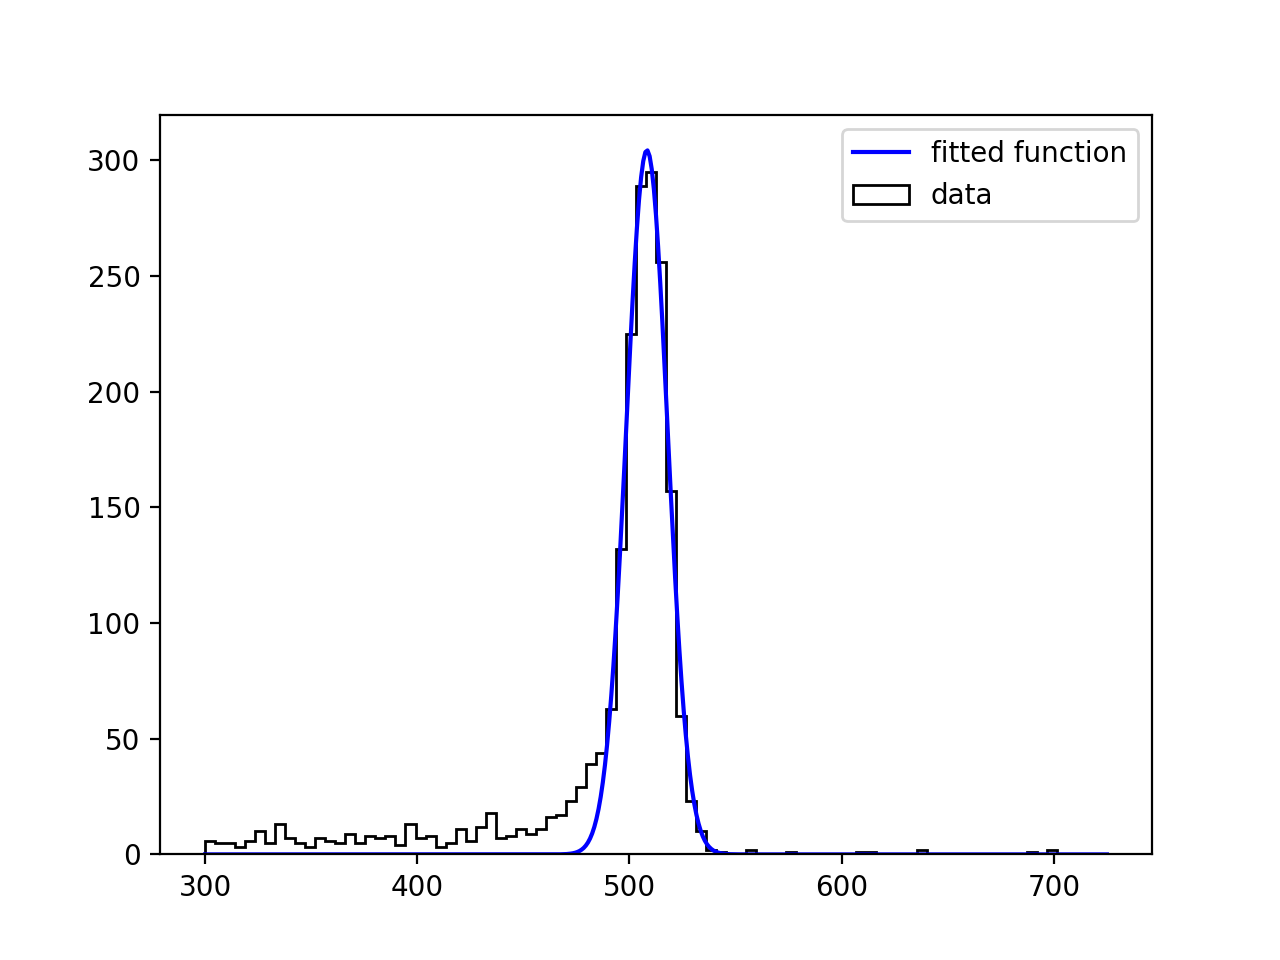

In [11]:
%matplotlib notebook
plt.hist(phase_peaks, bins=n_bins, label='data', color='black', histtype='step', range = (x_min, x_max))

x = np.linspace(x_min, x_max, x_max-x_min)
plt.plot(x, gauss(x, *pars), 'b-', label='fitted function')
plt.legend()